1.0
[1]
0.7142857142857143


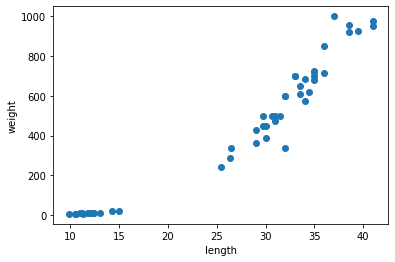

In [32]:
# 도미와 빙어 판별기
import matplotlib.pyplot as plt    #matplotlib의 pylot 함수를 plt로 줄여서 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49모델

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w]for l,w in zip(length, weight)]

fish_target = [1] * 35 + [0] * 14

kn.fit(fish_data, fish_target)    #fit() 메소드는 학습시키는 역할을 한다.
print(kn.score(fish_data, fish_target)) # 훈련이 얼마나 잘 됐는지를 평가하는 score() 메소드. 0부터 1까지 출력된다. 1이면 완벽하게 학습된것이고, 0.5면 절반.
print(kn.predict([[30,600]]))           # k-최근접 이웃 알고리즘은, 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 한다.
                                        # 위 30,600의 데이터는 주위에 도미 데이터가 많으므로 이 데이터를 도미라고 판단할 것이다. 따라서 1이 출력됐다.
                                        # predict() 메소드는 새로운 데이터의 정답을 예측한다.
kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target))    # fish_data 의 데이터 49개 중 도미가 35개 로 다수를 차지하므로, 어떤 데이터를 넣어도 무조건 도미로 예측할 것이다.                                    
plt.scatter(length, weight)
plt.xlabel('length')            # x축은 길이
plt.ylabel('weight')            # y축은 무게
plt.show()